<a href="https://colab.research.google.com/github/justnurik/ml_projects/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ 1

In [33]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

from tqdm import tqdm

sns.set(font_scale=1.0, style='whitegrid')
%config InlineBackend.figure_format='retina'

## Задча 1 (2 балла)
Пусть $X_1, \dots, X_n$ - выборка из распределения $U(-\theta, \theta)$, $\theta > 0$.  
Построить оценку параметра $\theta$ методом максимального правдоподобия. Проверить её на состоятельность (руками).

### 1. Нахождение ОМП

Распределение $U(- \theta, \theta)$ имеет функцию плотности:
$$
f(x | \theta) = \frac{1}{2 \theta} \mathbb{I}[-\theta, \theta](x)
$$

Тогда правдоподобие выглядит как:

$$
L(\theta) = f(X | \theta) = f(X_1 | \theta) \cdot ... \cdot f(X_n | \theta) = \left( \frac{1}{2 \theta} \right)^n \mathbb{I}[-\theta, \theta](X_1, ... , X_n)
$$

Для того чтобы правдоподобие не обращалось в ноль, параметр $\theta$ должен удовлетворять условию:
$$
\theta \geq \max_{i = 1, ... , n} |X_i|.
$$

Логарифм функции правдоподобия:
$$
\ln L(\theta) = -n \ln (2 \theta).
$$

Максимизируем логарифм правдоподобия по $\theta$:

$$
\hat \theta_{\text{ОМП}} = \operatorname*{arg\,max}_{\theta \geq \max_{i = 1, ... , n} |X_i|} ln L(\theta) =  \operatorname*{arg\,max}_{\theta \geq \max_{i = 1, ... , n} |X_i|} -n \ln (2 \theta)
$$

Так как функция $-n \ln(2\theta)$ убывает при увеличении $\theta$, максимум достигается при наименьшем возможном значении $\theta$, удовлетворяющем ограничению. Таким образом, оценка максимального правдоподобия параметра $\theta$ равна:
$$
\hat \theta_{\text{ОМП}} = \max_{i = 1, ... , n} |X_i|.
$$


### 2. Состоятельность оценки.

Покажем, что оценка $\hat{\theta}_{\text{ОМП}}$ является состоятельной, то есть:
$$
\hat{\theta}_{\text{ОМП}} \xrightarrow{p} \theta, \quad \text{при } n \to \infty.
$$

Для этого найдем функцию распределения $\hat{\theta}_{\text{ОМП}}$:
$$
F_{\hat \theta_{\text{ОМП}}}(x) = P_{\theta}(\hat{\theta}_{\text{ОМП}} \leq x) = P_{\theta} \left( \max_{i = 1, ... , n} |X_i| \leq x \right).
$$

Так как $X_1, ..., X_n$ — независимые случайные величины, имеющие одинаковое распределение, то:
$$
P_{\theta} \left( \max_{i = 1, ... , n} |X_i| \leq x \right) = \prod_{i=1}^{n} P_{\theta}(|X_i| \leq x).
$$

Используем факт, что для $X_i \sim U(-\theta, \theta)$:
$$
P_{\theta}(|X_i| \leq x) = P_{\theta}(-x \leq X_i \leq x) = F_{\theta}(x) - F_{\theta}(-x - 0) -  = \frac{x + \theta - (-x + \theta)}{2\theta} = \frac{2x}{2\theta} = \frac{x}{\theta}, \quad \text{при } 0 \leq x \leq \theta.
$$

Следовательно:
$$
F_{\hat \theta_{\text{ОМП}}}(x) = \left( \frac{x}{\theta} \right)^n, \quad 0 \leq x \leq \theta.
$$

При $\theta \geq \hat \theta_{\text{ОМП}}$:
$$
P_{\theta}(|\hat{\theta}_{\text{ОМП}} - \theta| \geq \varepsilon) = P_{\theta}(\theta - \hat{\theta}_{\text{ОМП}} \geq \varepsilon) = P_{\theta}(\hat{\theta}_{\text{ОМП}} \leq \theta - \varepsilon).
$$

$$
P_{\theta}(\hat{\theta}_{\text{ОМП}} \leq \theta - \varepsilon) = \left( \frac{\theta - \varepsilon}{\theta} \right)^n.
$$

Так как $\frac{\theta - \varepsilon}{\theta} < 1$, то:
$$
\lim_{n \to \infty} \left( \frac{\theta - \varepsilon}{\theta} \right)^n = 0.
$$

Следовательно:
$$
\lim_{n \to \infty} P_{\theta}(\hat{\theta}_{\text{ОМП}} \leq \theta - \varepsilon) = 0.
$$

Аналогично разбираем случай $\theta \leq \hat \theta_{\text{ОМП}}$:
$$
\lim_{n \to \infty} P_{\theta}(\hat{\theta}_{\text{ОМП}} \geq \theta + \varepsilon) = 0.
$$

Таким образом:
$$
\lim_{n \to \infty} P_{\theta}(|\hat{\theta}_{\text{ОМП}} - \theta| \geq \varepsilon) = 0,
$$
что означает, что $\hat{\theta}_{\text{ОМП}}$ является состоятельной оценкой параметра $\theta$.


## Задча 2 (2 балла) (Метод выбора с отклонением)
Пусть $X$ имеет плотность $f(x)$, а мы умеем строить величину с плотностью $g(x)$, причем $f(x)/g(x) \leq c$.  
Сгенерируем величину $Y$ с плотностью $g(x)$ и с вероятностью $f(Y)/(c g(Y))$ возьмем её в качестве $X$, иначе повторим процедуру.  
Доказать, что данный метод даёт случайную величину с плотностью $f(x)$.  
Какое $c$ можно взять в данном методе?

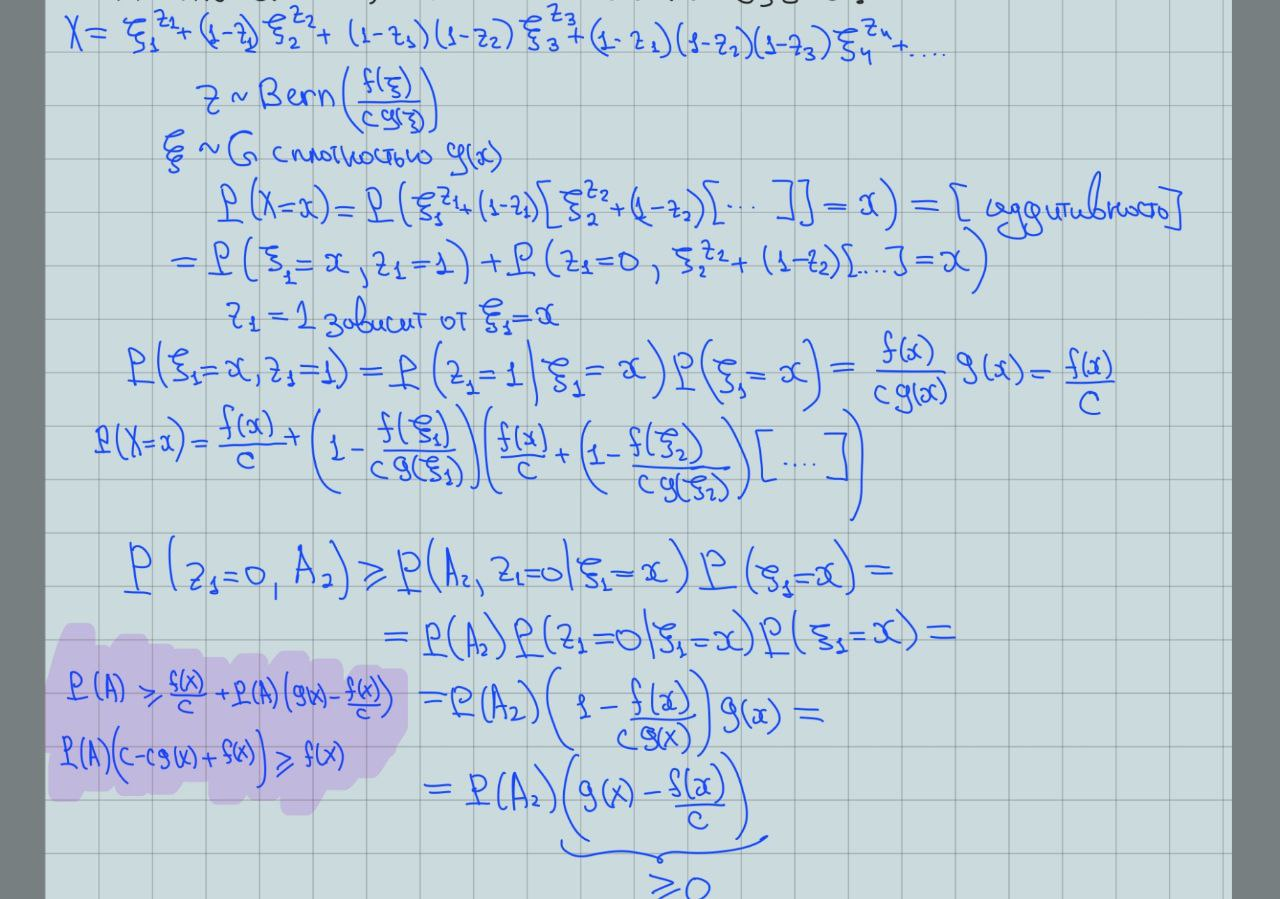

## Задча 3 (2 балла)
На примере бесконечной выборки $X = (X_1, X_2, \dots)$ из произвольного распределения с конечным вторым моментом изучить поведение статистики
$$
T_n = \frac{\sum_{i=1}^{n} X_i - n \mathbb{E}X_1}{\sqrt{n \mathbb{D}X_1}}.
$$
Сходится ли $T_n$ на какой-нибудь реализации выборки $X$? Как вы это объясните?  
Также проверьте, что центральная предельная теорема всё же выполняется.



$T_n$ сходится при $X = (1, 1, 1, \dots)$, причём $X$ взято из распределения с конечным (ненулевым) вторым моментом. В этом случае $T_n = 0$ для любого $n$, то есть статистика сходится к 0.  

Мы показали, что всегда существует выборка (конкретная её реализация), для которой $T_n$ сходится. Это можно обеспечить, выбрав выборку, как описано выше.  

Следующий логичный вопрос: **можно ли выбрать распределение так, чтобы вероятность того, что выборка оказывается такой, что $T_n$ сходится, была ненулевой?**



**Ответ на этот вопрос отрицательный.**

Предположим, что существует вероятностное пространство $(\Omega, \mathcal{F}, Q)$ а также число $A$ такое, что для любой бесконечной выборки из распределения $Q$ выполняется:  
$$
Q \left(\frac{X_1(\omega) +  \dots + X_n(\omega) - n \mathbb{E}X_1}{\sqrt{n \mathbb{D}X_1}} \xrightarrow{n \to \infty} A \right) = Q(\Theta) = \theta > 0.
$$
Из Центральной предельной теоремы следует, что  
$$
T_n \xrightarrow{d} \mathcal{N}(0, 1),
$$
что эквивалентно  
$$
\forall x \in \mathbb{R} \quad Q(T_n \leq x) \xrightarrow{n \to \infty} F(x),
$$
где $F(x)$ - функция распределения $\mathcal{N}(0, 1)$ (Это выполнено для всех $x$ так как $F(x)$ непрерывна на $\mathbb{R}$.  

Из непрерывности $F(x)$ точке $A$ будет следовать:  
$$
\forall \epsilon > 0  \quad \exists \delta > 0: \forall x \in (A - \delta, A + \delta) \quad |F(A) - F(x)| < \epsilon.
$$
Тогда по определению непрерывности получаем, что для $\epsilon = \theta$ существует $\delta > 0$ такое что:  
$$
\forall x \in (A - \delta, A) \quad F(A) - F(x) < \epsilon.
$$
Выбираем $x_0 = A - \frac{\delta}{2}$ тогда $F(A) - F(x_0) < \epsilon$  

Заметим, что для любого $\omega \in \Theta$ выполняется $T_n(\omega) \xrightarrow{n \to \infty} A$. Тогда для всех $x < A$ элементы из множества $\Theta$ будут включены в сумму $Q(T \leq x)$ а для любого $x \geq A$ элементы $\Theta$ будут учтены в $Q(T \leq x)$. Это даёт противоречие:  
$$
F(A) - F(x_0) > \theta.
$$
Следовательно, таких распределений не существует.

На самом деле возникает вопрос (и его вариации), на который хочется получить ответ:  

**Существует ли такое распределение, что для любой бесконечной выборки из него и для любого элементарного исхода наблюдается сходимость $T_n$ (необязательно к одному числу)?**

P.S. мне кажется что ответ тоже нет.

### Проверим выполнимость ЦПТ.

In [12]:
class NormalChecker:
    def __init__(self):
        pass

    def __stat_check(self, sample, alpha=0.05, is_print=True):
        """ Проверка нормальности с помощью статистических тестов."""
        shapiro_test = sps.shapiro(sample)
        ks_test = sps.kstest(sample, 'norm', args=(np.mean(sample), np.std(sample)))
        anderson_test = sps.anderson(sample, dist='norm')
        jarque_bera_test = sps.jarque_bera(sample)

        shapiro_result = "ОТКЛОНЯЕМ H0" if shapiro_test.pvalue < alpha else "НЕ ОТКЛОНЯЕМ H0"
        ks_result = "ОТКЛОНЯЕМ H0" if ks_test.pvalue < alpha else "НЕ ОТКЛОНЯЕМ H0"
        jarque_bera_result = "ОТКЛОНЯЕМ H0" if jarque_bera_test.pvalue < alpha else "НЕ ОТКЛОНЯЕМ H0"

        if is_print:
            print("\nРезультаты тестов нормальности:\n")

            print(f"Шапиро-Уилк: p-value = {shapiro_test.pvalue:.5f} -> {shapiro_result}")
            print(f"Колмогоров-Смирнов: p-value = {ks_test.pvalue:.5f} -> {ks_result}")
            print(f"Харке-Бера: p-value = {jarque_bera_test.pvalue:.5f} -> {jarque_bera_result}\n")

            print("Андерсон-Дарлинг тест:")
            print(f"  - Статистика теста: {anderson_test.statistic:.5f}")

            print("  - Критические значения и уровни значимости:")
            for level, crit_value in zip(anderson_test.significance_level, anderson_test.critical_values):
                result = "ОТКЛОНЯЕМ H0" if anderson_test.statistic > crit_value else "НЕ ОТКЛОНЯЕМ H0"
                print(f"    {level:.2f}% уровень: критическое значение = {crit_value:.5f} -> {result}")

            print("")

        return shapiro_test.pvalue, ks_test.pvalue, anderson_test.statistic, jarque_bera_test.pvalue
    def __qq_plot_check(self, sample):
        """Построение Q-Q plot для проверки нормальности."""
        with sns.axes_style("darkgrid"):
            plt.figure(figsize=(8, 8))
            sps.probplot(sample, plot=plt)
            plt.title("Q-Q Plot")
            plt.show()

    def __hist_and_kde_check(self, sample):
        """Построение гистограммы, KDE и теоретического нормального распределения."""
        with sns.axes_style("darkgrid"):
            plt.figure(figsize=(10, 5))

            sns.histplot(sample, kde=True, stat="density", label="Выборка (гистограмма + KDE)")

            mean, std = np.mean(sample), np.std(sample, ddof=1)
            x = np.linspace(min(sample), max(sample), 1000)
            y = sps.norm.pdf(x, loc=mean, scale=std)

            plt.plot(x, y, 'r--', label="Теоретическая нормальная плотность")

            plt.ylabel("Плотность")
            plt.xlabel("Значение")
            plt.title("Гистограмма, KDE и теоретическая нормальная плотность")

            plt.legend(loc=1)
            plt.show()

    def __CalcDn(self, sample, cdf):
        sample_size = sample.shape[0]

        sorted_samples = np.sort(sample)

        cdf_value = cdf(sorted_samples)

        left_diff = np.arange(1, sample_size + 1) / sample_size - cdf_value
        right_diff = cdf_value - np.arange(0, sample_size) / sample_size

        D_n_values = np.max(np.maximum(left_diff, right_diff))
        return D_n_values

    def __cdf_eq_check(self, sample, mu=None, std=None):
        """Проверка равенства эмпирической и теоретической CDF."""
        if mu is None:
            mu = np.mean(sample)
        if std is None:
            std = np.std(sample, ddof=1)

        norm_distrib_cdf = sps.norm(mu, std).cdf
        return self.__CalcDn(sample, norm_distrib_cdf)

    def check(self, data, method='stat', **params):
        """Основной метод для проверки нормальности."""
        if method == 'stat':
            return self.__stat_check(data, **params)

        if method == 'cdf_eq':
            return self.__cdf_eq_check(data, **params)

        if method == 'qq':
            self.__qq_plot_check(data, **params)
        elif method == 'hist_and_kde':
            return self.__hist_and_kde_check(data, **params)
        else:
            raise ValueError("Неверный метод проверки")

Класс для проверки ЦПТ.

In [16]:
class CLT_checker:
    def __init__(self, distrib):
        self.distrib = distrib
        self.normal_checker = NormalChecker()

    def __T_n(self, X):
        n = X.shape[1]
        return (np.sum(X, axis=1) - n * self.distrib.mean()) / np.sqrt(n * self.distrib.var())

    def __Cum_T_n(self, X):
        n = np.arange(X.shape[1]) + 1
        return (np.cumsum(X, axis=1) - n * self.distrib.mean()) / np.sqrt(n * self.distrib.var())

    def __cdf_eq_check(self, cum_T_n, step=10):
        """Проверка равенства эмпирической и теоретической CDF на разных размерах выборки."""
        errors = [
            self.normal_checker.check(cum_T_n[:, i], method='cdf_eq', mu=0, std=1)
            for i in range(step, cum_T_n.shape[1], step)
        ]

        with sns.axes_style("darkgrid"):
            plt.figure(figsize=(12, 8))

            plt.plot(np.arange(step, cum_T_n.shape[1], step), errors)

            plt.title("Мера отличия функции распределения от размера выборки")
            plt.xlabel("Размер выборки")
            plt.ylabel("Норма разности функций распределения")
            plt.grid(True)

            plt.show()

    def check(self, count=10**4, sample_size=10**3, method='stat', **params):
        """Основной метод проверки нормальности T_n."""
        samples = self.distrib.rvs(size=(count, sample_size))
        T_n = self.__T_n(samples)

        if method == 'cdf_eq':
            return self.__cdf_eq_check(self.__Cum_T_n(samples), **params)

        if method in ['qq', 'hist_and_kde', 'stat']:
            return self.normal_checker.check(T_n, method=method, **params)
        else:
            raise ValueError("Неверный метод проверки")

Будем проверять ЦПТ на Бета распределении.

In [17]:
clt = CLT_checker(sps.expon(5))

Графическая проверка.

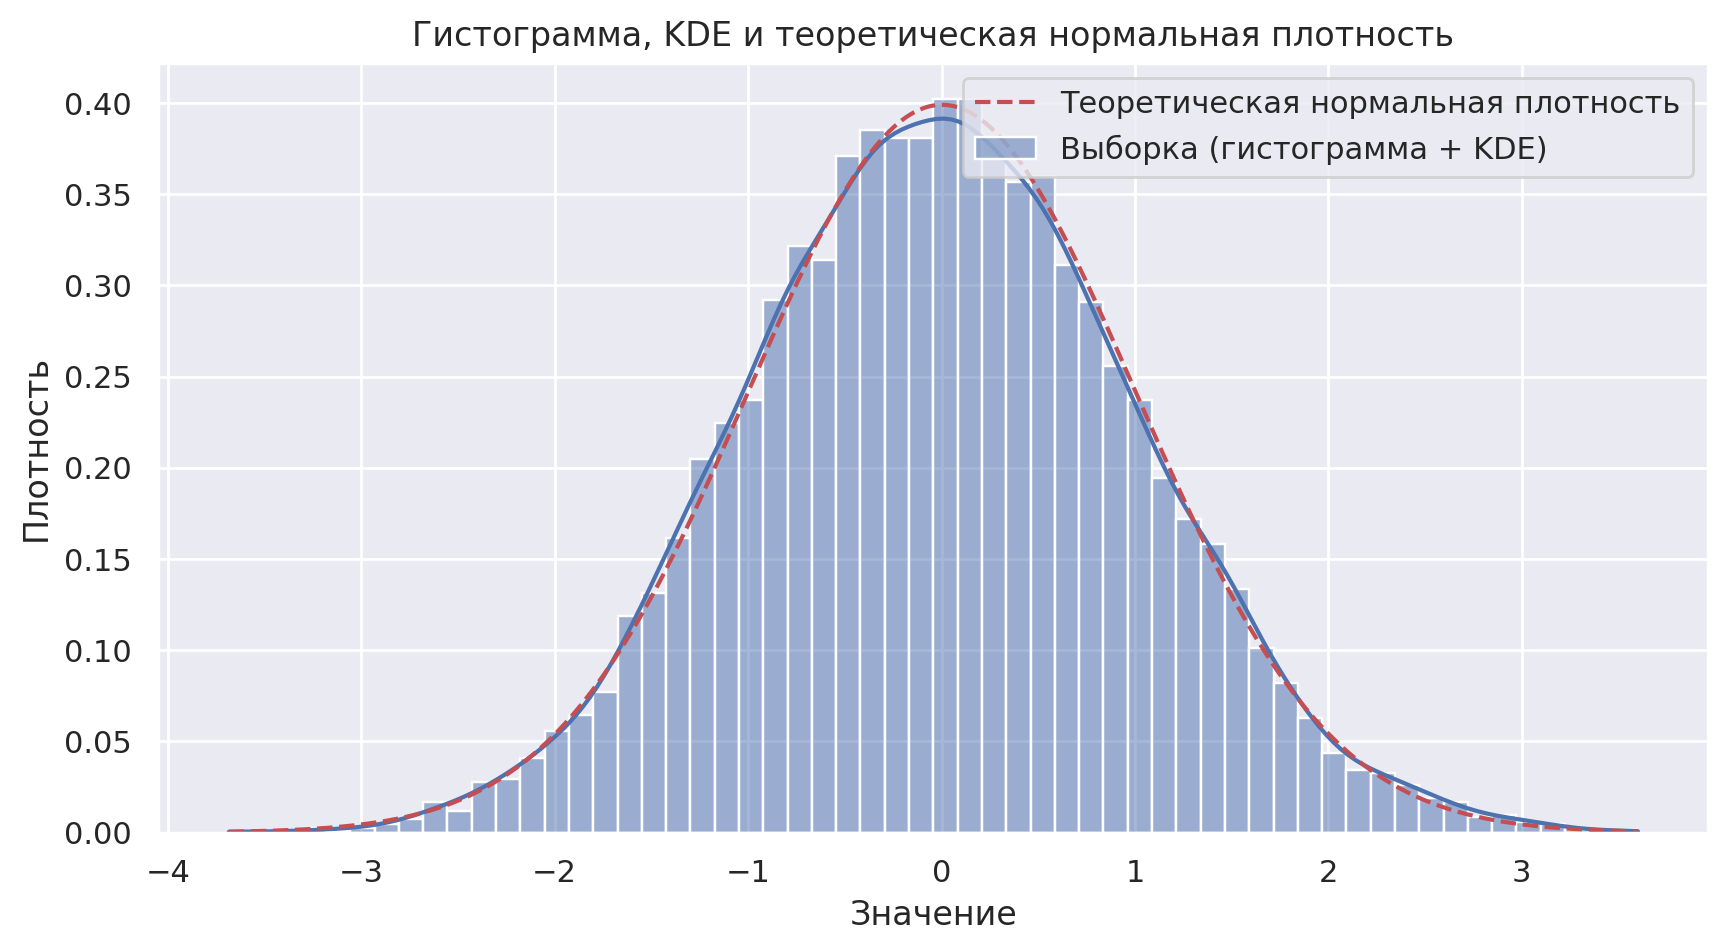

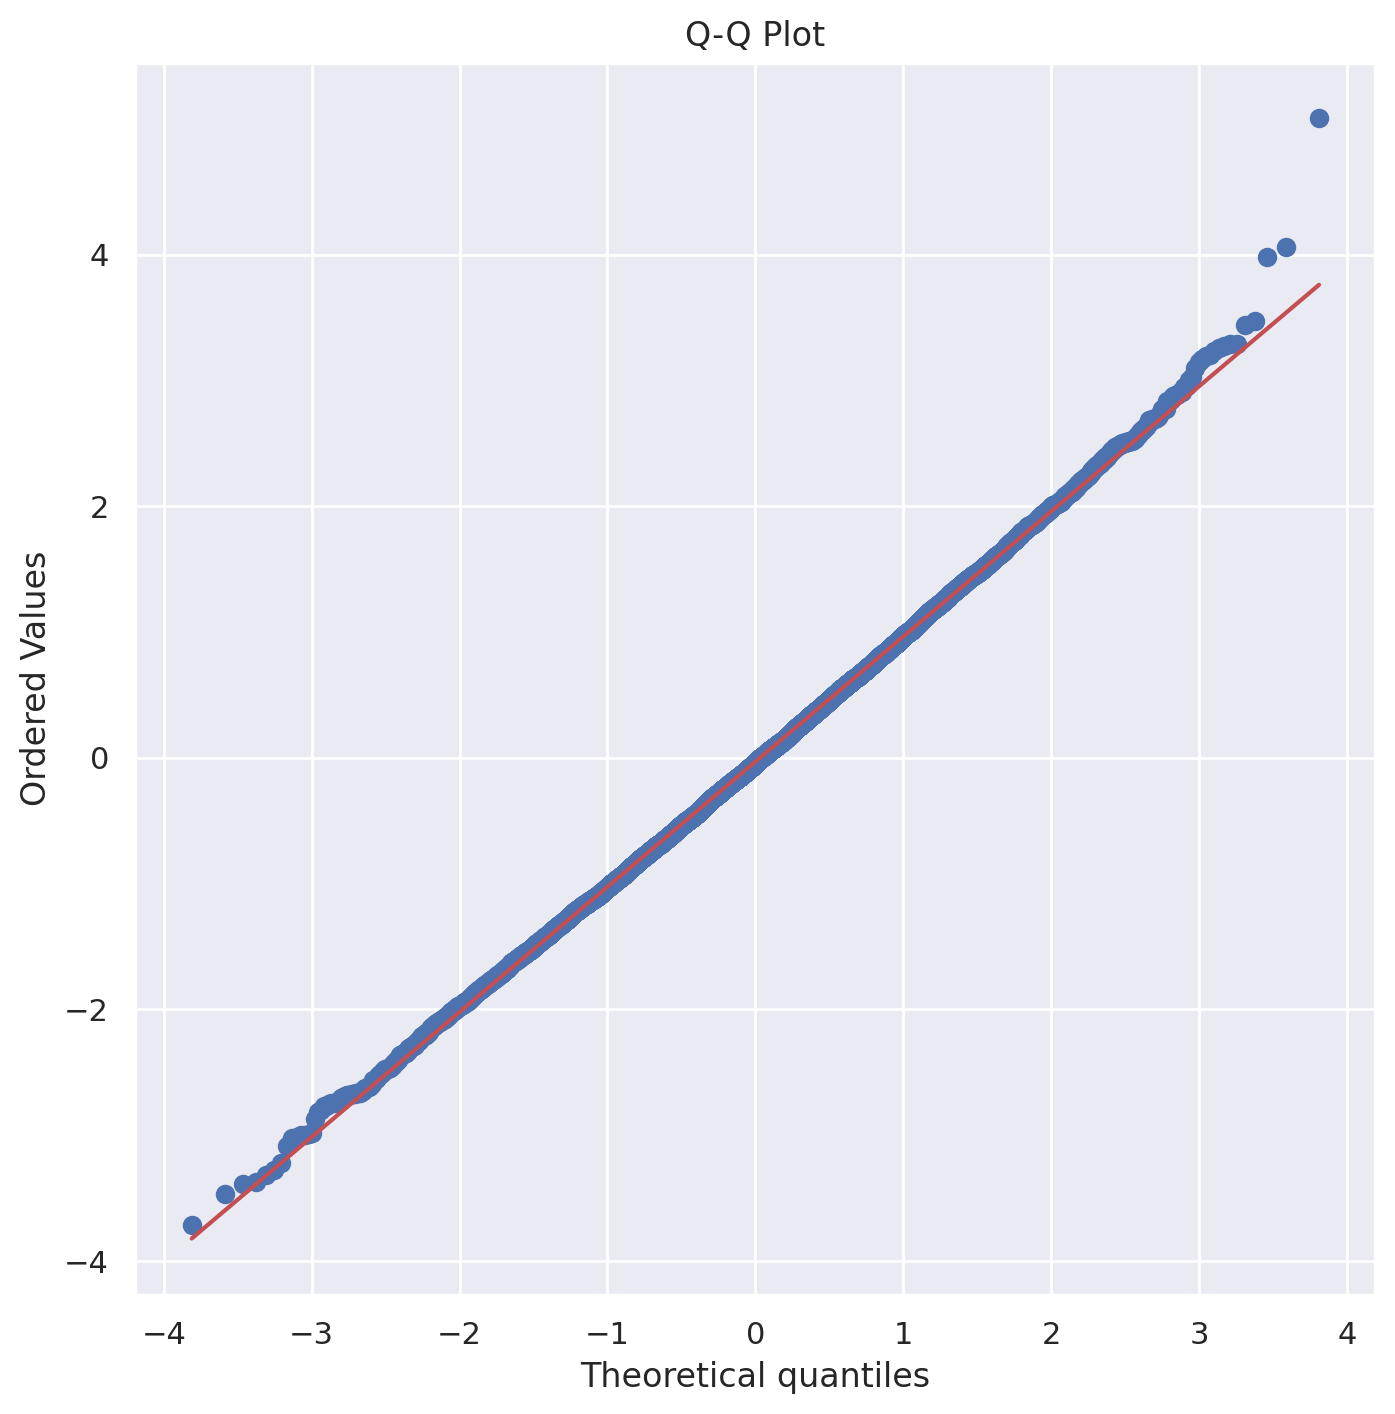

In [5]:
clt.check(method='hist_and_kde')
clt.check(method='qq')

Графики показывают, что распределение статистики $T_n$ является нормальным. Однако в таких заключениях есть проблема. Во-первых, не видна тенденция при увеличении размера выборки. Во-вторых, делать выводы на основе графиков (например, "линия похожа на прямую, значит, распределение нормальное" или "график напоминает колокол, значит, всё в порядке") не совсем корректно.

Посмотрим что скажит критерии проверки на нормальность.

In [30]:
clt.check(method="stat", count=10**3, sample_size=10**1)
clt.check(method="stat", count=10**3, sample_size=10**2)
clt.check(method="stat", count=10**3, sample_size=10**3);


Результаты тестов нормальности:

Шапиро-Уилк: p-value = 0.00000 -> ОТКЛОНЯЕМ H0
Колмогоров-Смирнов: p-value = 0.00248 -> ОТКЛОНЯЕМ H0
Харке-Бера: p-value = 0.00000 -> ОТКЛОНЯЕМ H0

Андерсон-Дарлинг тест:
  - Статистика теста: 5.93499
  - Критические значения и уровни значимости:
    15.00% уровень: критическое значение = 0.57400 -> ОТКЛОНЯЕМ H0
    10.00% уровень: критическое значение = 0.65300 -> ОТКЛОНЯЕМ H0
    5.00% уровень: критическое значение = 0.78400 -> ОТКЛОНЯЕМ H0
    2.50% уровень: критическое значение = 0.91400 -> ОТКЛОНЯЕМ H0
    1.00% уровень: критическое значение = 1.08800 -> ОТКЛОНЯЕМ H0


Результаты тестов нормальности:

Шапиро-Уилк: p-value = 0.01429 -> ОТКЛОНЯЕМ H0
Колмогоров-Смирнов: p-value = 0.28401 -> НЕ ОТКЛОНЯЕМ H0
Харке-Бера: p-value = 0.02882 -> ОТКЛОНЯЕМ H0

Андерсон-Дарлинг тест:
  - Статистика теста: 1.16057
  - Критические значения и уровни значимости:
    15.00% уровень: критическое значение = 0.57400 -> ОТКЛОНЯЕМ H0
    10.00% уровень: критическое зна

Так как сходимость по распределению эквивалентна сходимости функций распределения, то проверим, как сходится функция распределения статистики $T_n$ при увеличении $n$.

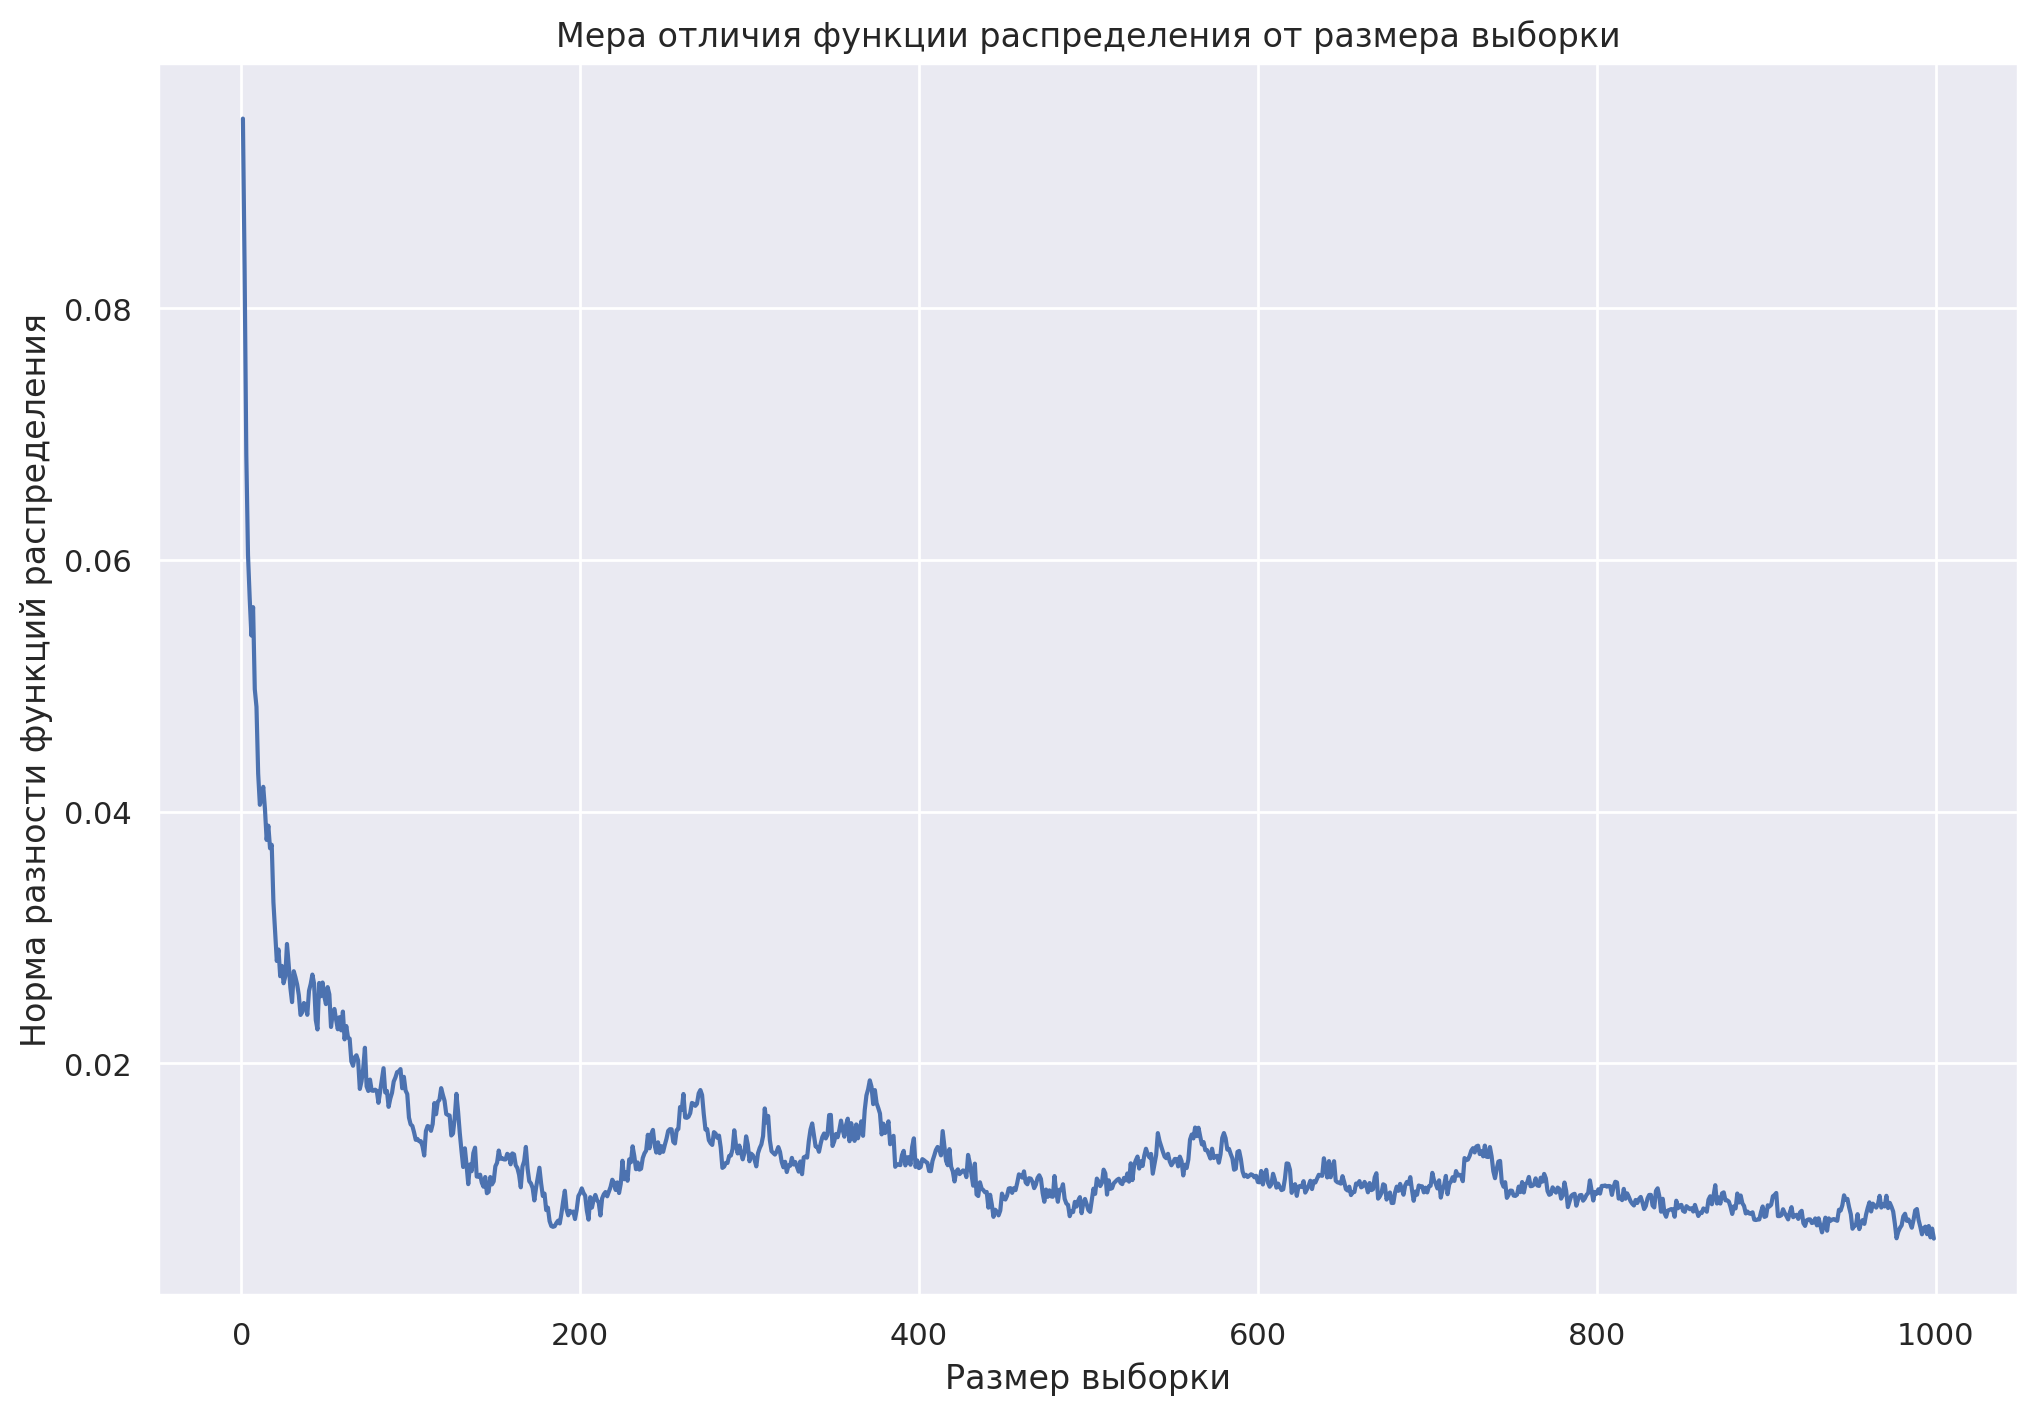

In [29]:
clt.check(method="cdf_eq", count=10**4, sample_size=1000, step=1)

Показали несколько способов проверки ЦПТ. Самыми надёжными, на мой взгляд, являются последние два метода. Однако, как мне кажется, наилучший способ - проверка сходимости функции распределения статистики к функции распределения нормального распределения, ведь в этом случае мы проверяем сходимость непосредственно по определению.

## Задча 4 (2 балла)
Пусть выборка $ X_1, \dots, X_{100}$ сделана из распределения Парето с параметром $\alpha > 0$, имеющего плотность  
$$
p(x) = \alpha x^{-\alpha - 1} \mathbb{I}\{x > 1\}.
$$
Для всех $\alpha \in (0,5)$ (по мелкой решётке) построить по выборке доверительные интервалы уровня доверия $\gamma$ для параметра $\alpha$,  
вывести их на графике в зависимости от $\alpha$ и сделать выводы.


### 1. Нахождение доверительного интервала

_**Теорема**. Пусть $\xi$ — случайная величина с непрерывной функцией распределения $F(x)$. Тогда $F(\xi) \sim U[0, 1]$._

Тогда $F_{\alpha}(X_i) \sim U[0, 1]$, и в силу симметрии получаем, что $1 - F_{\alpha}(X_i) \sim U[0, 1]$.

Заметим, что $-\ln [1 - F_{\alpha}(X_i)] \sim Exp(1)$. Отсюда получаем центральную статистику $G(X, \alpha)$:

$$
G(X, \alpha) = - \sum_{i = 1}^n \ln [1 - F_{\alpha}(X_i)] = - \sum_{i = 1}^n \ln [X_i^{-\alpha}] = \alpha \sum_{i = 1}^n \ln X_i = n \cdot \alpha \cdot \overline{\ln X}
$$

Так как $G(X, \alpha)$ — это сумма экспоненциальных распределений, то $G(X, \alpha) \sim \Gamma(n, 1)$.

Если $z_p$ — это $p$-квантиль распределения $\Gamma(n, 1)$, то получаем точный доверительный интервал с уровнем доверия $\gamma$:

$$
P_{\alpha} \left( \frac{z_{\frac{1 - \gamma}{2}}}{\sum_{i = 1}^n \ln X_i} < \alpha < \frac{z_{\frac{1 + \gamma}{2}}}{\sum_{i = 1}^n \ln X_i} \right) = \gamma
$$

### 2. Практика


In [ ]:
sample_size = 100
count = 1000
alphas = np.linspace(0, 5, count)[1:-1:]
gamma = 0.95

Выборка из распределения Парето для $\alpha \in (0, 5)$.

In [ ]:
samples = [sps.pareto(b=alpha).rvs(size=sample_size) for alpha in alphas]

Считаем точные доверительные интервалы.

In [ ]:
def pareto_confidence_interval(X, alpha, gamma):
    quantile_left = sps.gamma(a=len(X)).ppf((1 - gamma) / 2)
    quantile_right = sps.gamma(a=len(X)).ppf((1 + gamma) / 2)

    log_sum = np.sum(np.log(X))
    interval_left = quantile_left / log_sum
    interval_right = quantile_right / log_sum

    return interval_left, interval_right

In [ ]:
confidence_interval = [pareto_confidence_interval(sample, alpha, gamma) for alpha, sample in zip(alphas, samples)]

Визуализация.

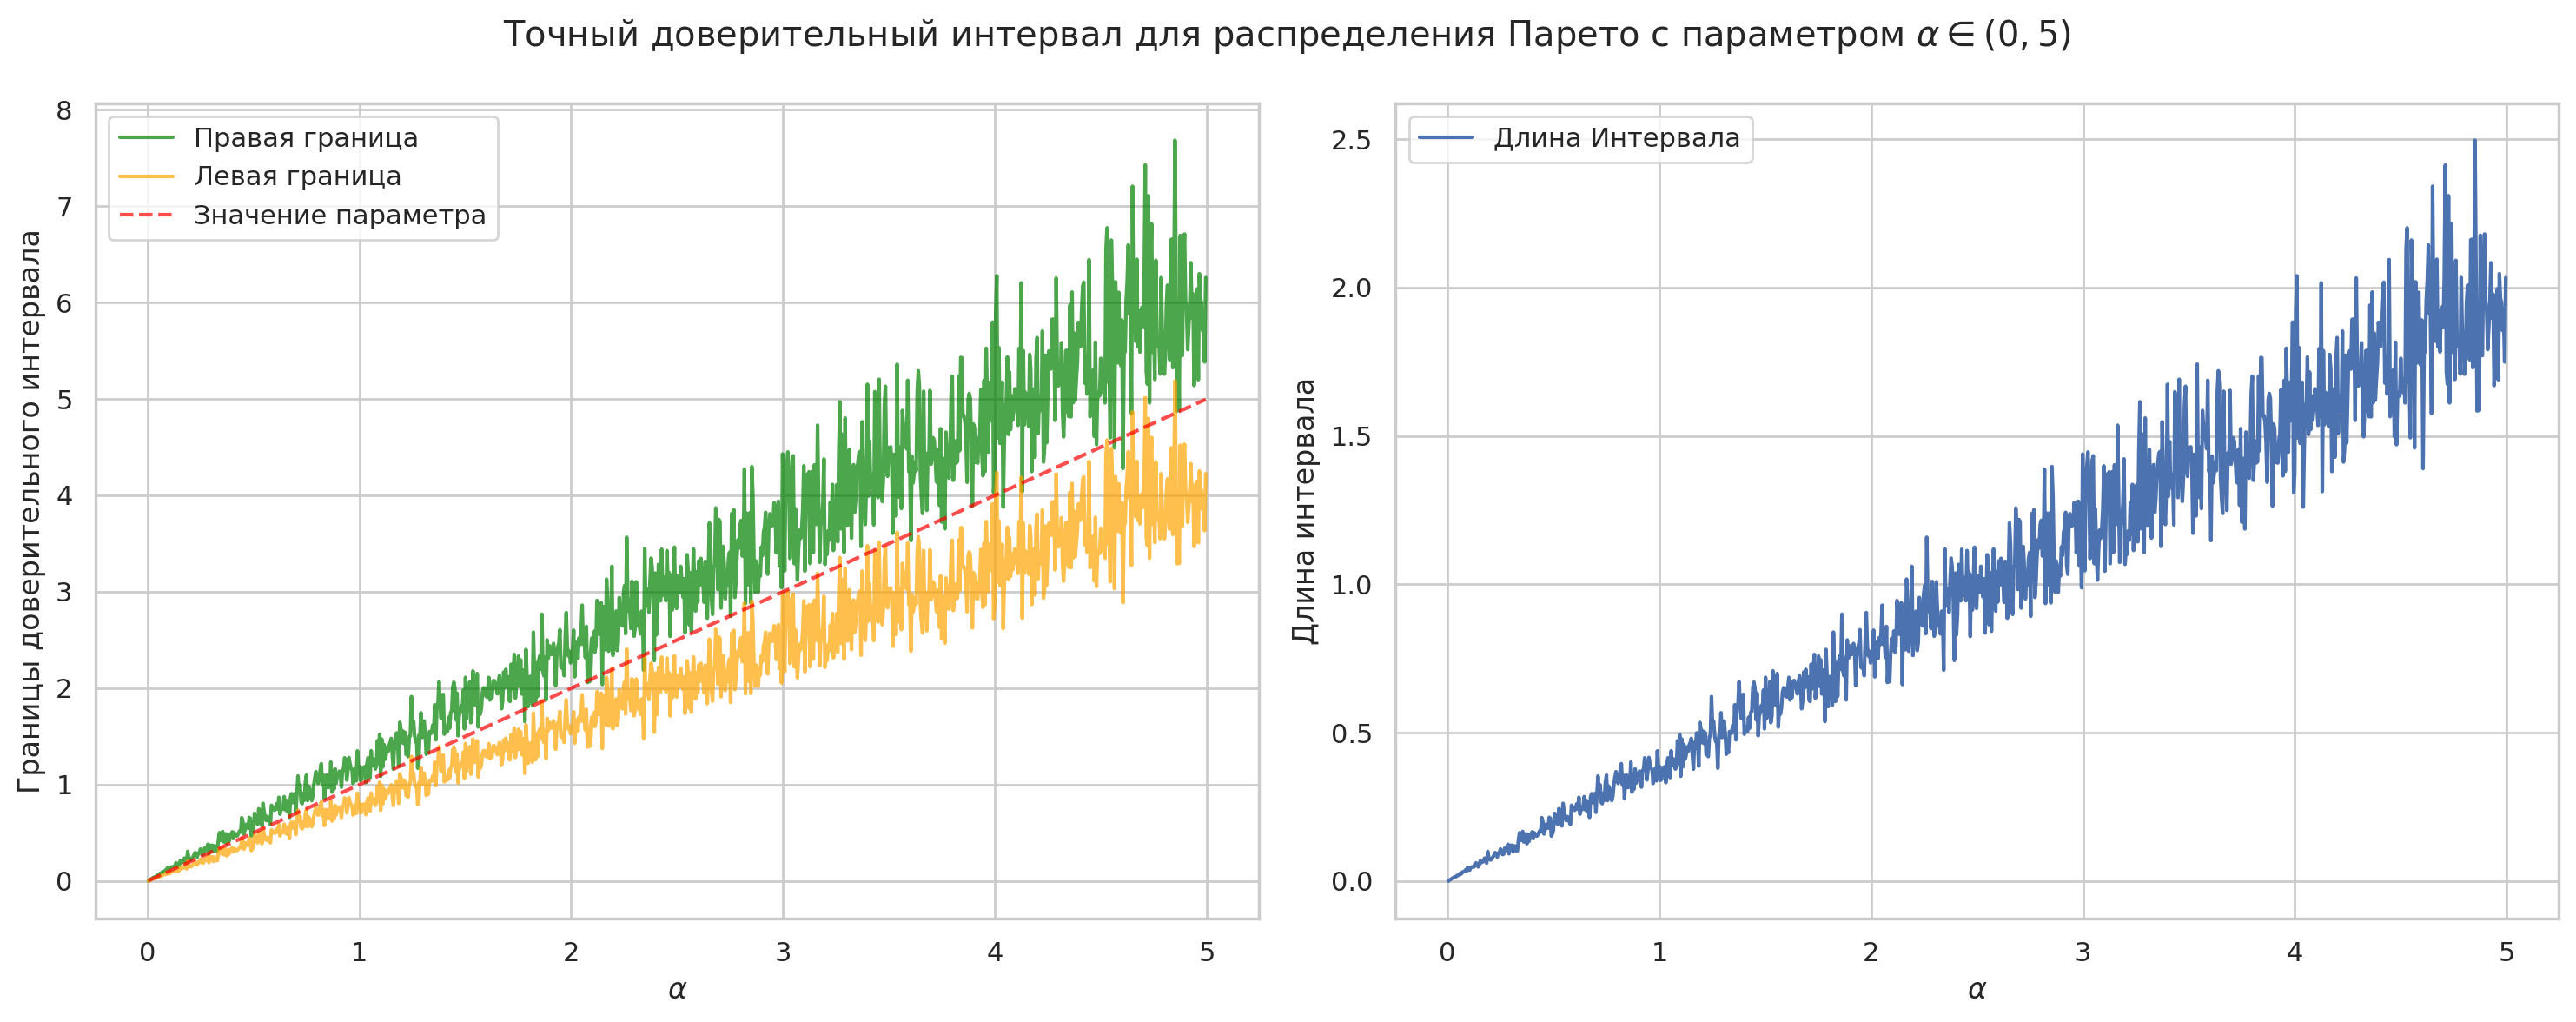

In [ ]:
with sns.axes_style("whitegrid"):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 6))

    fig.suptitle(r"Точный доверительный интервал для распределения Парето с параметром $\alpha \in (0, 5)$")

    ax1.plot(alphas, [interval[1] for interval in confidence_interval], label="Правая граница", color='green', alpha=0.7)
    ax1.plot(alphas, [interval[0] for interval in confidence_interval], label="Левая граница", color='orange', alpha=0.7)
    ax1.plot(alphas, alphas, color='red', linestyle="--", alpha=0.7, label="Значение параметра")

    ax2.plot(alphas, [interval[1] - interval[0] for interval in confidence_interval], label="Длина Интервала")

    ax1.set_xlabel(r"$\alpha$")
    ax2.set_xlabel(r"$\alpha$")
    ax1.set_ylabel(r"Границы доверительного интервала")
    ax2.set_ylabel(r"Длина интервала")

    ax1.legend()
    ax2.legend()

    fig.tight_layout()
    plt.show()

Выведем относительную ширину доверительного интервала нашей оценки.

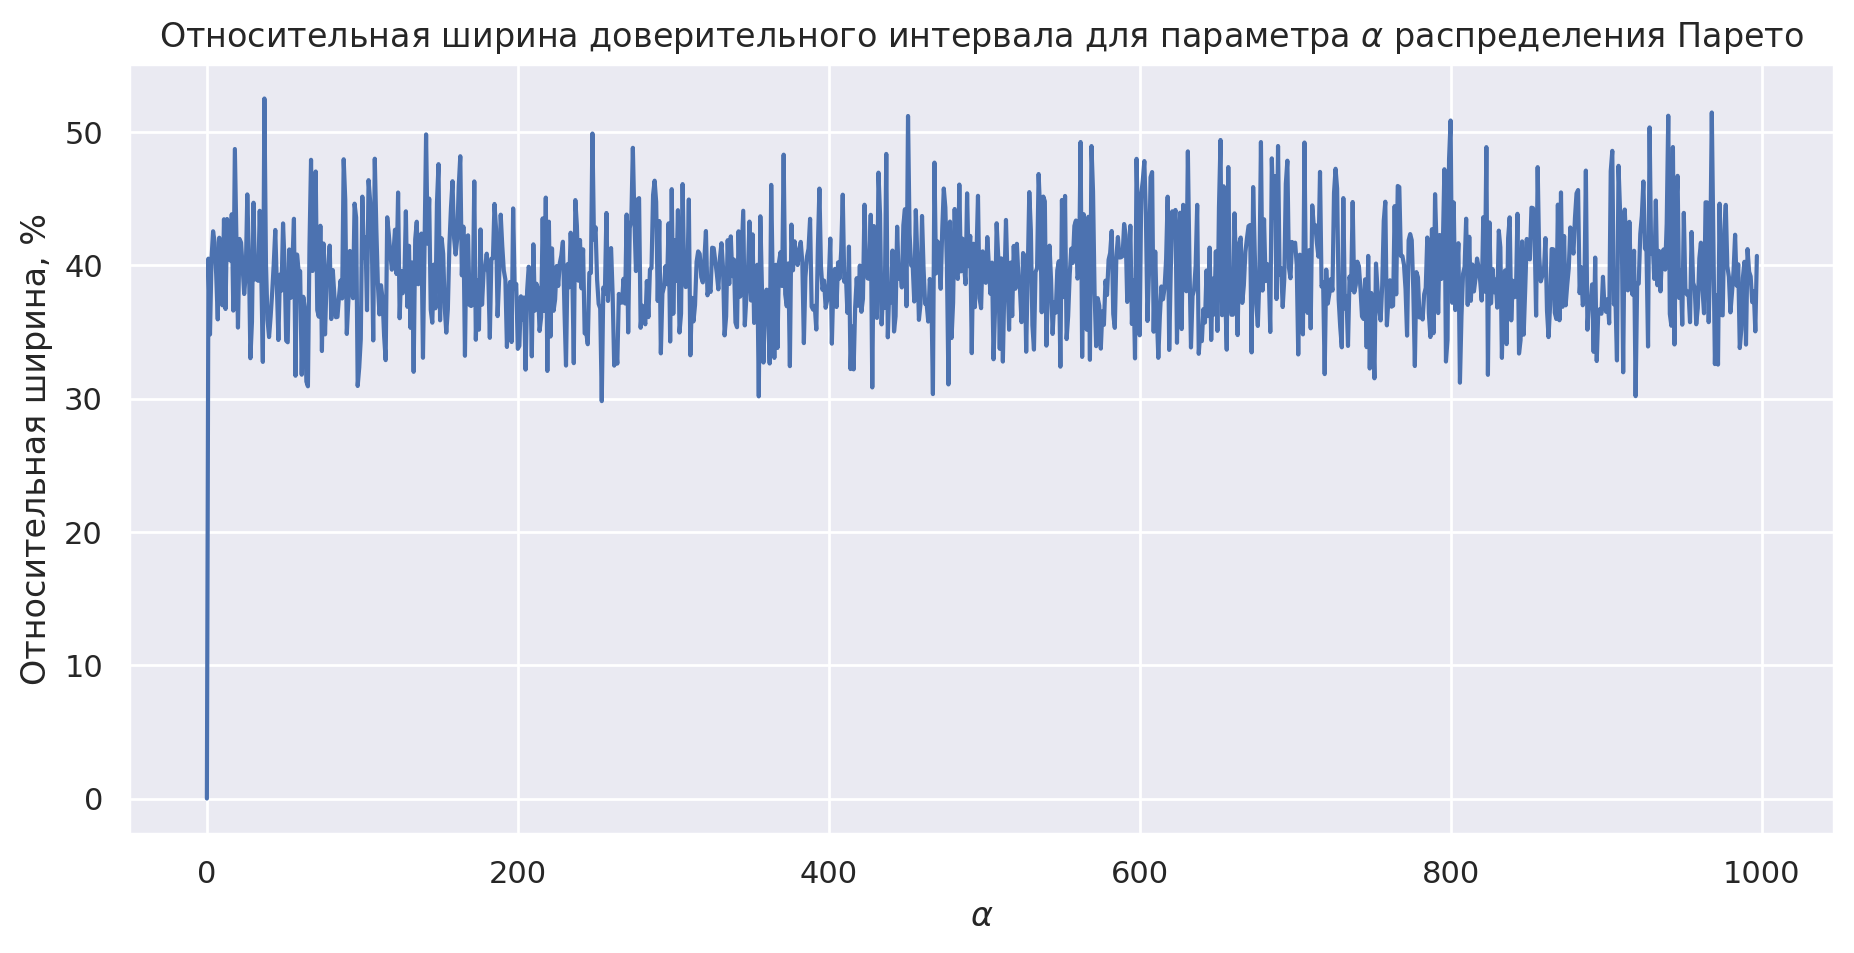

In [ ]:
with sns.axes_style("darkgrid"):
    plt.subplots(figsize=(11, 5))

    plt.plot([100 * (interval[1] - interval[0]) / alpha for alpha, interval in zip(alphas, confidence_interval)])

    plt.title(r"Относительная ширина доверительного интервала для параметра $\alpha$ распределения Парето")
    plt.xlabel(r"$\alpha$")
    plt.ylabel(r"Относительная ширина, %")

    plt.show()

**Вывод:** С ростом параметра $\alpha$ длина точного доверительного интервала увеличивается линейно. Однако на практике такая оценка, при размере выборки 100 может оказаться неэффективной, так как относительная ширина доверительного интервала остается значительной, хотя возможно все дело в малости выборки, и для такого размера лучше получить сложно.

## Задча 5 (2 балла)
Пусть  
$$
F(x) = 1 - \exp(-(\beta x)^\alpha), \quad x > 0, \alpha, \beta > 0
$$
функция распределения Вейбулла.  
Смоделировать выборку из этого распределения размера 100.  
Реализовать метод спейсивинга и найти этим методом оценки параметров $\alpha$ и $ \beta$.



Напишем класс Распределения Вейбулла.

In [ ]:
class Weibull(sps.rv_continuous):
    def __init__(self, alpha=1, beta=1):
        super().__init__(a=0, name="Weibull")
        self.alpha = alpha
        self.beta = beta

    def _cdf(self, x):
        return 1 - np.exp(- (self.beta * x) ** self.alpha)

    def _ppf(self, p):
        return ((-np.log(1 - p)) ** (1 / self.alpha)) / self.beta

    def _rvs(self, size=None, random_state=None):
        return self._ppf(sps.uniform(loc=0, scale=1).rvs(size=size, random_state=random_state))

    @classmethod
    def fit_with_spacing(cls, data, optimizer=minimize):
        """Метод спейсов для оценки параметров"""
        def spacing(params, data):
            alpha, beta = params
            sorted_data = np.sort(data)
            n = len(sorted_data)

            def cdf(x):
                return 1 - np.exp(- (beta * x) ** alpha)

            spacings = np.abs(np.diff(np.hstack(([0], cdf(sorted_data), [1]))))
            spacings = np.maximum(spacings, 1e-10)
            return -np.sum(np.log(spacings))

        initial_guess = [1, 1]
        alpha_hat, beta_hat = optimizer(spacing, initial_guess, args=(data), method="Powell").x
        return alpha_hat, beta_hat

Генерация данных.

In [ ]:
alpha = 19
beta = 50 - alpha

sample_size = 100
count = 1000

samples = Weibull(alpha, beta).rvs(size=(count, sample_size))

print(f"alpha: {alpha}, beta: {beta}")

alpha: 19, beta: 31


Визуализируем выборку.

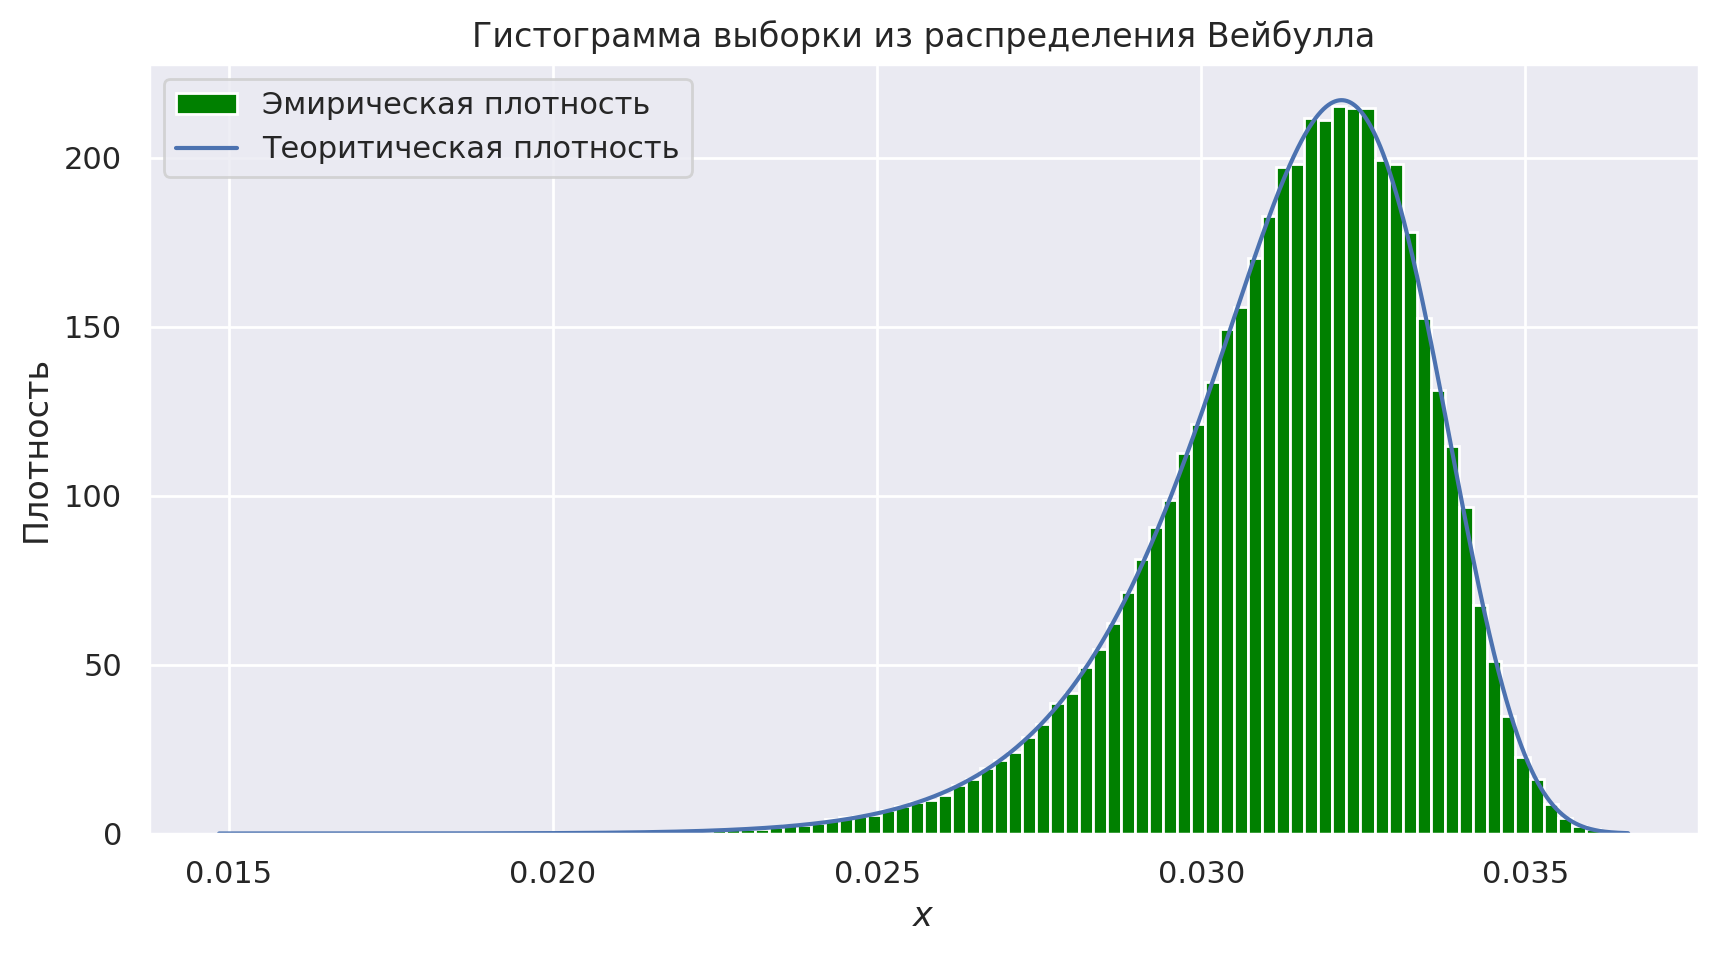

In [ ]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10, 5))

    plt.hist(samples.reshape(-1), bins=100, color='green', density=True, label='Эмирическая плотность')
    x = np.linspace(np.min(samples.reshape(-1)), np.max(samples.reshape(-1)), 10**4)
    plt.plot(x, Weibull(alpha, beta).pdf(x), label='Теоритическая плотность')

    plt.title(r"Гистограмма выборки из распределения Вейбулла")
    plt.ylabel(r"Плотность")
    plt.xlabel(r"$x$")

    plt.legend()
    plt.show()

Оценка методом спейсингов.

In [ ]:
result = [Weibull.fit_with_spacing(data=sample) for sample in samples]
alphas = np.array([res[0] for res in result])
betas = np.array([res[1] for res in result])

In [ ]:
np.median(alphas), np.median(betas)

(18.454909379678213, 31.000292183483644)

In [ ]:
alphas.mean(), betas.mean()

(18.55073648706834, 31.003141654713705)

In [ ]:
alphas.std(), betas.std()

(1.5106375460769554, 0.17649121566465703)

**Вывод:** как мы можем видеть, метод спейсингов достаточно хорошо оценивает даже при таких малых размерах выборки, особенно второй параметр $\beta$.  

## Задча 6 (2 балла)
Пусть $X_1, \dots, X_n$ - выборка.  
Определим оценку Пиканда индекса экстремального значения как  
$$
\gamma_p = \frac{1}{\ln 2} \ln \frac{X_{(n-k)} - X_{(n-2k)}}{X_{(n-2k)} - X_{(n-4k)}}.
$$
Известно, что для распределения Парето с параметром $\alpha$ данная оценка, как и оценка Хилла, является состоятельной для параметра $\gamma = 1/\alpha$, при $k \to \infty, \, k/n \to 0$.  
Определить, какая оценка лучше при малых значениях $n$ (скажем, $n < 1000$), и обосновать свой выбор.  
Предложить метод определения оптимального значения $k$ при малых значениях $n$.  
Оценить индекс экстремального значения по датасету **Aids2** из пакета **MASS** языка **R**.



In [978]:
def pickands_estimator(X, k):
    X_sorted = np.sort(X, axis=0)

    term1 = X_sorted[-k] - X_sorted[-2 * k]
    term2 = X_sorted[-2 * k] - X_sorted[-4 * k]

    gamma_p = (np.log(term1) - np.log(term2)) / np.log(2)

    return gamma_p


def hill_estimator(X, k):
    X_sorted = np.sort(X, axis=0)[::-1]

    mean_log = np.mean(np.log(X_sorted[:k]), axis=0)
    log_X_k = np.log(X_sorted[k - 1])
    gamma_H = mean_log - log_X_k

    return gamma_H

Фиксируем параметр $\alpha = 2$.

In [989]:
alpha = 2
gamma = 1 / alpha
size = 1000
count = 100
samples = sps.pareto(alpha).rvs((size, count))

Посмотрим на поведение оценок при различных к.

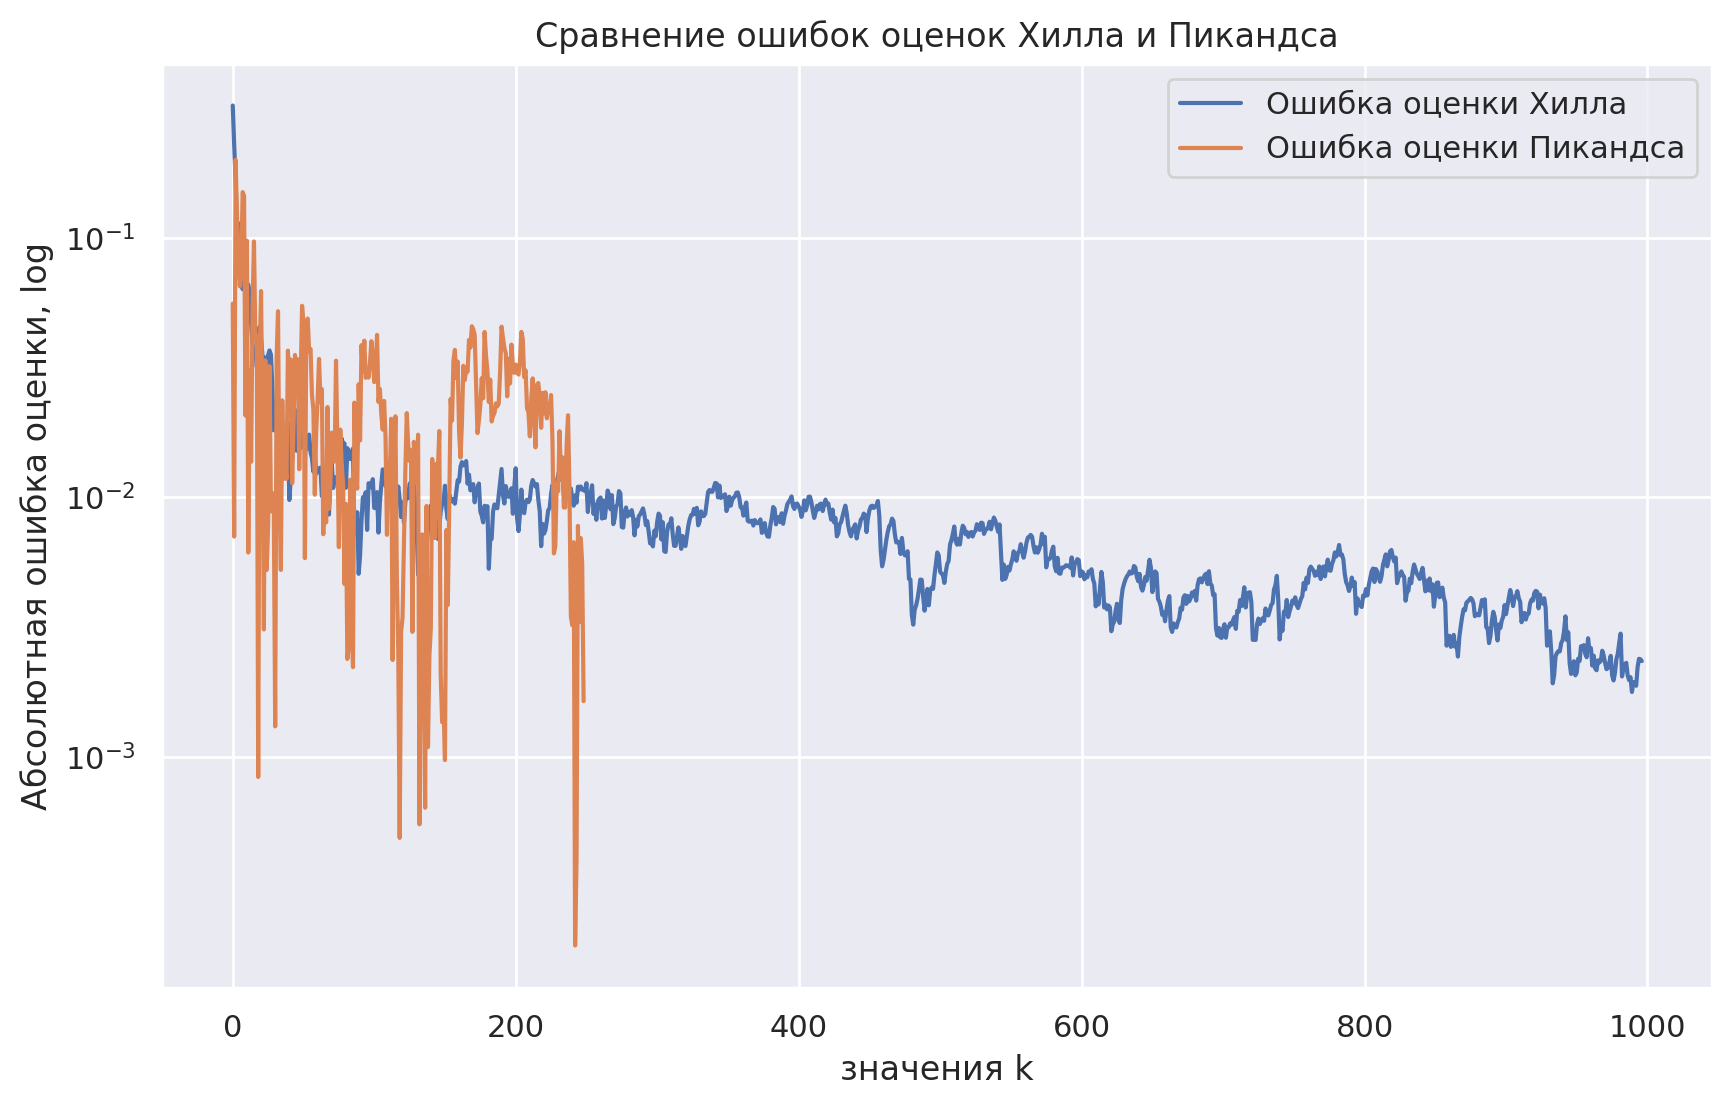

In [997]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10, 6))

    plt.plot(
        [abs(gamma - np.median(hill_estimator(samples, k))) for k in range(2, size - 1)],
        label="Ошибка оценки Хилла"
    )

    plt.plot(
        [abs(gamma - np.median(pickands_estimator(samples, k))) for k in range(1, size//4)],
        label="Ошибка оценки Пикандса"
    )

    plt.yscale('log')

    plt.xlabel("значения k")
    plt.ylabel("Абсолютная ошибка оценки, log")
    plt.title("Сравнение ошибок оценок Хилла и Пикандса")

    plt.legend()
    plt.grid(True)
    plt.show()

При нужно значении параметра к для оценки Пикандса, получается более оптимальная оценка. (меньшее смещение)

Подбираем оптимальное k:

1. Эмпирический кажется что к надо подберать как последний возможный элемент.

2. Минимизируем дисперсию оценки, причем чтобы посчитать дисперсию оценки мы используем бутстрап.

In [1069]:
def Bootstrap(sample, sample_size, bootstrap_shape):
    return sample[np.random.randint(0, sample_size, bootstrap_shape)]


def optimal_k(X, method):
    bootstrap = Bootstrap(X, X.shape[0], X.shape[0])
    k_values = np.arange(5, len(X) // (4 if method == "pickands" else 1))
    estimates = np.array([pickands_estimator(bootstrap, k) if method == "pickands" else hill_estimator(bootstrap, k) for k in k_values])

    stable_k = k_values[np.argmin(np.var(estimates, axis=1))]
    return stable_k

In [1070]:
opt_k_pickands = optimal_k(samples, method="pickands")
opt_k_hill = optimal_k(samples, method="hill")

print(f"Оптимальное k для Пикандса: {opt_k_pickands}")
print(f"Оптимальное k для Хилла: {opt_k_hill}")

Оптимальное k для Пикандса: 231
Оптимальное k для Хилла: 999


In [1000]:
print(f"Оптимальное k для Пикандса: {size//4}")
print(f"Оптимальное k для Хилла: {size-1}")

Оптимальное k для Пикандса: 250
Оптимальное k для Хилла: 999


Оба подхода выдали примерно одинаковый результат.

### Оценка индекса экстремального значения по датасету Aids2

In [1077]:
df = pd.read_csv("Aids2.csv")

X_sample = df['death'].dropna().values  # Убираем пропущенные значения
n = X_sample.shape[0]

alpha_hill = hill_estimator(X_sample, n-1)
alpha_pickands = pickands_estimator(X_sample, n//4)

print(f"Оценка Хилла gamma_p: {1 / alpha_hill:.4f}")
print(f"Оценка Пикандса gamma_p: {1 / alpha_pickands:.4f}")

Оценка Хилла gamma_p: 4.0426
Оценка Пикандса gamma_p: -0.3149
